In [1]:
using JuMP
using Gurobi
using CSV
using DataFrames
using Plots

In [2]:
N = 4356
Tx = CSV.read("real_distances/drop_distance_matrix.csv", DataFrame, drop=1:1)[1:N, 1:N] |> Matrix #N, N
Ty = CSV.read("real_distances/distance_matrix_store_to_drop.csv",DataFrame, drop=1:1)[:, 1:N] |> Matrix; #M, N
Tz = CSV.read("real_distances/drop_to_store_distance_matrix.csv",DataFrame, drop=1:1)[1:N, :] |> Matrix; #N, M

function filter_distance_matrix(matrix, threshold)
    M, N = size(matrix)
    filtered_edges = Dict()  # Initialize an empty dictionary

    for i in 1:M
        for j in 1:N
            if matrix[i, j] <= threshold
                # Store the distance value with the key as the (i, j) tuple
                filtered_edges[(i, j)] = matrix[i, j]
            end
        end
    end

    return filtered_edges
end

filter_distance_matrix (generic function with 1 method)

In [10]:
x = []
y = [] 
z = []
for d in range(.5, step=15, length=1000)
    println(d)
    filtered_Tx = filter_distance_matrix(Tx, d)
    filtered_Ty = filter_distance_matrix(Ty, d)
    filtered_Tz = filter_distance_matrix(Tz, d)
    push!(x, length(keys(filtered_Tx)))
    push!(y, length(keys(filtered_Ty)))
    push!(z, length(keys(filtered_Tz)))

end

0.5
15.5
30.5
45.5
60.5
75.5
90.5
105.5
120.5
135.5
150.5
165.5
180.5
195.5
210.5
225.5
240.5
255.5
270.5
285.5
300.5
315.5
330.5
345.5
360.5
375.5
390.5
405.5
420.5
435.5
450.5
465.5
480.5
495.5
510.5
525.5
540.5
555.5
570.5
585.5
600.5
615.5
630.5
645.5
660.5
675.5
690.5
705.5
720.5
735.5
750.5
765.5
780.5
795.5
810.5
825.5
840.5
855.5
870.5
885.5
900.5
915.5
930.5
945.5
960.5
975.5
990.5
1005.5
1020.5
1035.5
1050.5
1065.5
1080.5
1095.5
1110.5
1125.5
1140.5
1155.5
1170.5
1185.5
1200.5
1215.5


LoadError: InterruptException:

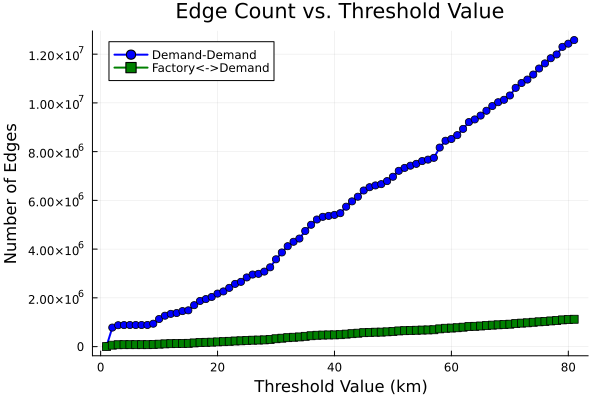

In [12]:
plot(x, label="Demand-Demand", lw=2, marker=:circle, color=:blue)
plot!(y, label="Factory<->Demand", lw=2, marker=:square, color=:green)
ylabel!("Number of Edges")
xlabel!("Threshold Value (km)")
title!("Edge Count vs. Threshold Value")
savefig("counts.png")
plot!()

